In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import feather
import scipy as sp 
import time
from sklearn.manifold import spectral_embedding
from sklearn.cluster import spectral_clustering
from sklearn.cluster.spectral import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import *
import pickle
from sklearn.utils.graph import graph_laplacian
from sklearn.utils.arpack import eigsh
from sklearn.manifold.spectral_embedding_ import _set_diag
from scipy.linalg import eigvals, eigvalsh
import seaborn
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

In [2]:
recom = pd.read_csv('../data/5plus_recommended.csv')

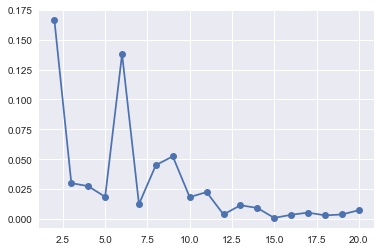

In [18]:
# similarity = cosine_similarity(recom.iloc[:, 1:].values)
normed_laplacian, dd = graph_laplacian(similarity, normed=True, return_diag=True)
laplacian = _set_diag(normed_laplacian, 1, 0)


n_components = similarity.shape[0] - 1


eigenvalues, eigenvectors = eigsh(-laplacian, k=20, which="LM", sigma=1.0, maxiter=5000)
# eigenvalues = eigvalsh(-laplacian)
eigenvalues = -eigenvalues[::-1]  # Reverse and sign inversion.

max_gap = 0
gap_pre_index = 0
gaps = []
for i in range(1, eigenvalues.size):
    gap = eigenvalues[i] - eigenvalues[i - 1]
    gaps.append(gap)
    if gap > max_gap:
        max_gap = gap
        gap_pre_index = i - 1

k = gap_pre_index + 1
plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')

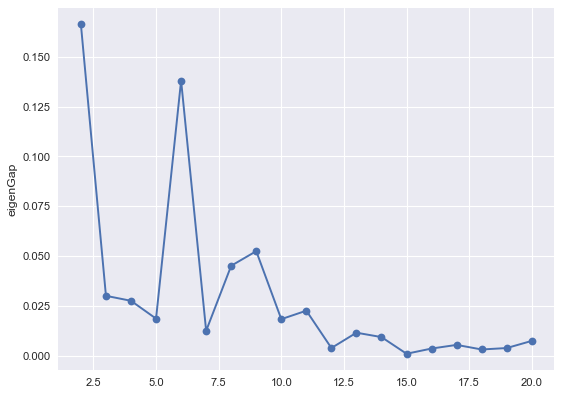

In [19]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')
plt.ylabel('eigenGap')
plt.savefig('../report/eigengap-recom.pdf', format='pdf')

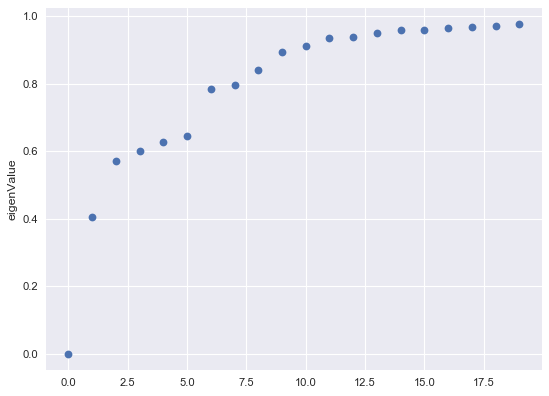

In [20]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0,20), eigenvalues[:20], 'o')
plt.ylabel('eigenValue')
plt.savefig('../report/eigenvalues-recom.pdf', format='pdf')

In [28]:
cl = SpectralClustering(n_clusters=5,
                        assign_labels='discretize', affinity='precomputed', 
                        eigen_solver='amg',
                        n_jobs=-1)

label = cl.fit_predict(similarity)

(array([  2.85500000e+03,   0.00000000e+00,   1.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.50000000e+01,   0.00000000e+00,
          3.11800000e+03]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

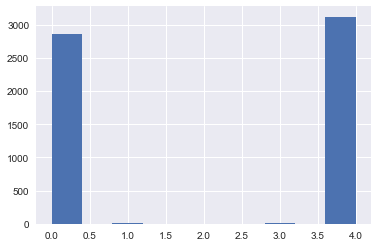

In [29]:
plt.hist(label)

In [30]:
indx = recom.biz_id
labels = pd.DataFrame({'biz_id' :  indx, 'label' : label})
labels.to_csv('../data/recomm_spectral_clustering_kmeans.label.csv')